Imports

In [1]:
import sys
sys.path.insert(0, '/Users/hinzlehome/codeup-data-science/clustering-exercises/')

from utils.imports import *

In [2]:
def acquire():

    query = '''
    SELECT *
    FROM measurements
	LEFT JOIN species USING (species_id)
    ;
    '''
    
    if os.path.exists('/Users/hinzlehome/codeup-data-science/clustering-exercises/csvs/iris.csv'):
        df = pd.read_csv('/Users/hinzlehome/codeup-data-science/clustering-exercises/csvs/iris.csv')
    else:
        url=get_db_url('iris_db')
        df = pd.read_sql(query, url)
        df.to_csv('/Users/hinzlehome/codeup-data-science/clustering-exercises/csvs/iris.csv', index=False)
    return df

In [3]:
df=acquire()

In [4]:
df.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [5]:
X=df[['petal_width','sepal_width']]

In [6]:
X.head()

,petal_width,sepal_width
0,0.2,3.5
1,0.2,3.0
2,0.2,3.2
3,0.2,3.1
4,0.2,3.6


In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [8]:
df['cluster'] = kmeans.predict(X)

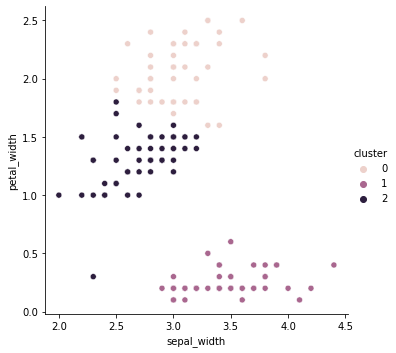

In [9]:
sns.relplot(data=df,x='sepal_width',y='petal_width', hue='cluster')

In [10]:
kmeans.cluster_centers_


array([[2.05208333, 3.04166667],
       [0.24489796, 3.45102041],
       [1.30943396, 2.70754717]])

In [11]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids


,petal_width,sepal_width
0,2.052083,3.041667
1,0.244898,3.451020
2,1.309434,2.707547


Use the elbow method to visually select a good value for k.


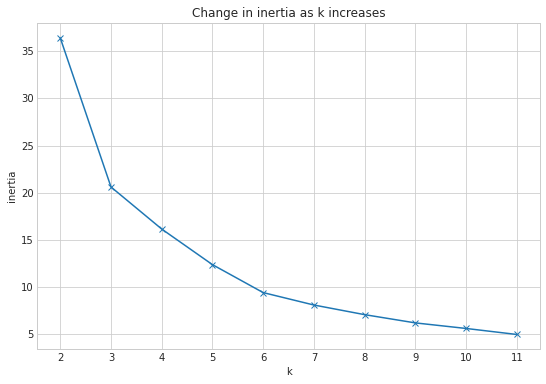

In [12]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


Repeat the clustering, this time with 3 different features.


In [13]:
X=df[['petal_length','sepal_length','sepal_width']]

In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [15]:
df['cluster'] = kmeans.predict(X)

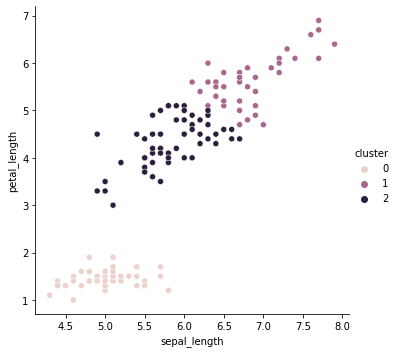

In [16]:
sns.relplot(data=df,x='sepal_length',y='petal_length', hue='cluster')

In [17]:
kmeans.cluster_centers_


array([[1.462     , 5.006     , 3.428     ],
       [5.6547619 , 6.83571429, 3.06428571],
       [4.3637931 , 5.84655172, 2.73275862]])

Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset.

In [18]:
def acquire_mall():

    query = '''
    SELECT *
    FROM customers
    ;
    '''
    
    if os.path.exists('/Users/hinzlehome/codeup-data-science/clustering-exercises/csvs/mall.csv'):
        df = pd.read_csv('/Users/hinzlehome/codeup-data-science/clustering-exercises/csvs/mall.csv')
    else:
        url=get_db_url('mall_customers')
        df = pd.read_sql(query, url)
        df.to_csv('/Users/hinzlehome/codeup-data-science/clustering-exercises/csvs/mall.csv', index=False)
    return df

In [19]:
df=acquire_mall()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     200 non-null    int64 
 1   gender          200 non-null    object
 2   age             200 non-null    int64 
 3   annual_income   200 non-null    int64 
 4   spending_score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [21]:
dummies=pd.get_dummies(df.gender,drop_first=True)

In [22]:
df=pd.concat([df,dummies],axis=1)

In [23]:
df=df.rename({'Male':'male'},axis=1)

In [24]:
df=df.drop(columns='gender')

In [25]:
df=df.astype('Int64')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   customer_id     200 non-null    Int64
 1   age             200 non-null    Int64
 2   annual_income   200 non-null    Int64
 3   spending_score  200 non-null    Int64
 4   male            200 non-null    Int64
dtypes: Int64(5)
memory usage: 8.9 KB


In [27]:
X=df[['age', 'annual_income','male']]
y=df[['spending_score']]

In [28]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

kmeans.predict(X)


array([1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 4, 2, 2, 4, 2, 2, 2, 4,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4,
       4, 2, 2, 4, 2, 4, 4, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 4, 4, 4, 4, 2, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       4, 0, 4, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [29]:
X['cluster'] = kmeans.predict(X)


/var/folders/mk/w2hz4wxx7xn5hr_56wz536gh0000gn/T/ipykernel_8113/2064813033.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.predict(X)


In [30]:
X.columns

Index(['age', 'annual_income', 'male', 'cluster'], dtype='object')

Be sure to visualize your results!

['<seaborn.axisgrid.FacetGrid object at 0x7fcec92752b0>',
 '<seaborn.axisgrid.FacetGrid object at 0x7fcec92fcbe0>',
 '<seaborn.axisgrid.FacetGrid object at 0x7fce80dd0760>',
 '<seaborn.axisgrid.FacetGrid object at 0x7fce80dd0760>']

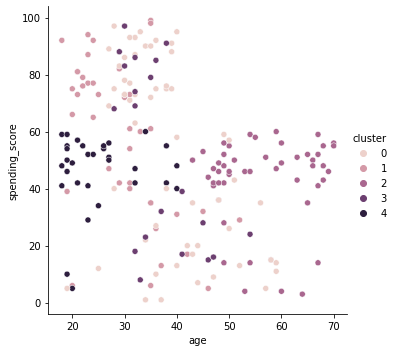

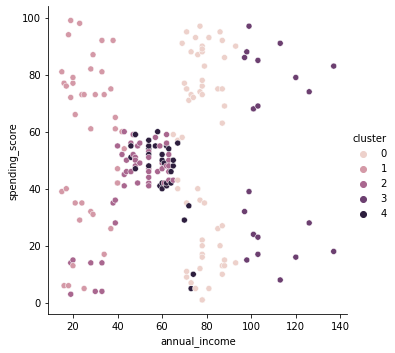

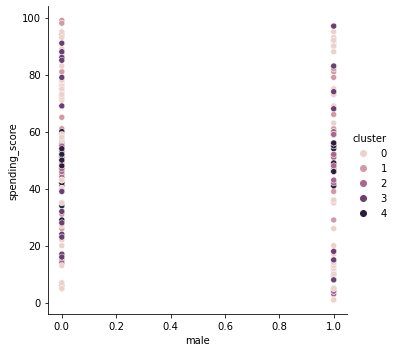

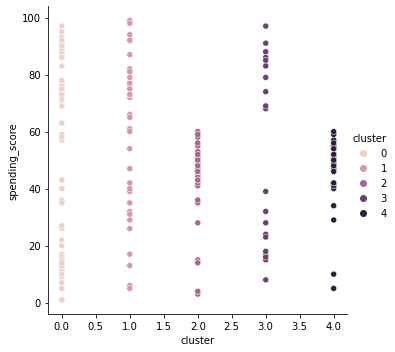

In [31]:
[f"{sns.relplot(data=X,x=i, y=y.spending_score,hue='cluster')}" for i in X.columns]

In [32]:
kmeans.cluster_centers_


array([[ 38.25862069,  78.15517241,   0.5       ],
       [ 29.53658537,  27.24390244,   0.34146341],
       [ 56.62      ,  48.48      ,   0.48      ],
       [ 36.6       , 109.7       ,   0.35      ],
       [ 25.06451613,  59.48387097,   0.4516129 ]])

In [33]:
X.columns

Index(['age', 'annual_income', 'male', 'cluster'], dtype='object')

In [34]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['age', 'annual_income', 'male'])
centroids


,age,annual_income,male
0,38.258621,78.155172,0.500000
1,29.536585,27.243902,0.341463
2,56.620000,48.480000,0.480000
3,36.600000,109.700000,0.350000
4,25.064516,59.483871,0.451613


Use the elbow method to visually select a good value for k.


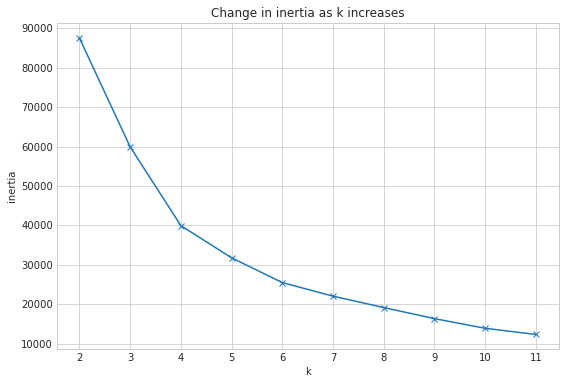

In [35]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


How does scaling impact the results of clustering?



In [36]:
X=df[['age', 'annual_income','male']]
y=df[['spending_score']]

In [37]:
columns_to_scale = ['age', 'annual_income', 'male']


In [38]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            200 non-null    Int64
 1   annual_income  200 non-null    Int64
 2   male           200 non-null    Int64
dtypes: Int64(3)
memory usage: 5.4 KB


In [39]:

scaler = MinMaxScaler()
scaler.fit(X[columns_to_scale])


MinMaxScaler()

In [40]:

X[columns_to_scale] = scaler.transform(X[columns_to_scale])


/usr/local/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [41]:
X.head()

,age,annual_income,male
0,0.019231,0.000000,1.0
1,0.057692,0.000000,1.0
2,0.038462,0.008197,0.0
3,0.096154,0.008197,0.0
4,0.250000,0.016393,0.0


In [42]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

kmeans.predict(X)


array([2, 2, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 3, 1, 2, 2, 1, 2, 0, 1, 2, 2,
       3, 2, 3, 2, 3, 2, 3, 1, 0, 1, 0, 2, 3, 1, 3, 1, 1, 1, 3, 2, 0, 1,
       3, 1, 3, 1, 1, 1, 3, 2, 1, 0, 3, 0, 3, 0, 1, 0, 0, 2, 3, 3, 0, 2,
       3, 3, 2, 1, 0, 3, 3, 3, 0, 2, 3, 2, 1, 3, 0, 2, 0, 3, 1, 0, 3, 1,
       1, 3, 3, 2, 0, 1, 1, 2, 3, 1, 0, 2, 1, 3, 0, 2, 0, 1, 3, 0, 0, 0,
       0, 1, 1, 2, 1, 1, 3, 3, 3, 3, 2, 1, 1, 2, 1, 1, 2, 2, 0, 2, 0, 2,
       1, 1, 2, 1, 3, 2, 2, 1, 3, 2, 1, 1, 2, 2, 0, 1, 1, 2, 2, 2, 3, 1,
       3, 1, 2, 1, 2, 1, 3, 1, 2, 1, 0, 1, 2, 1, 1, 2, 2, 2, 2, 2, 3, 1,
       0, 2, 0, 2, 1, 1, 2, 1, 1, 2, 3, 2, 1, 1, 1, 1, 2, 1, 3, 1, 3, 2,
       2, 2], dtype=int32)

In [43]:
X['cluster'] = kmeans.predict(X)

/var/folders/mk/w2hz4wxx7xn5hr_56wz536gh0000gn/T/ipykernel_8113/2739994605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['cluster'] = kmeans.predict(X)


['<seaborn.axisgrid.FacetGrid object at 0x7fce812b7070>',
 '<seaborn.axisgrid.FacetGrid object at 0x7fce812b7580>',
 '<seaborn.axisgrid.FacetGrid object at 0x7fcea956fdc0>',
 '<seaborn.axisgrid.FacetGrid object at 0x7fcea953a220>']

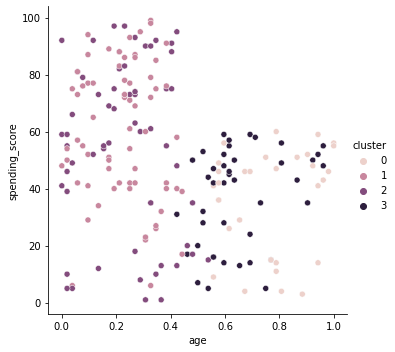

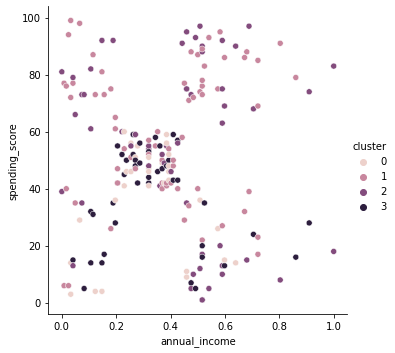

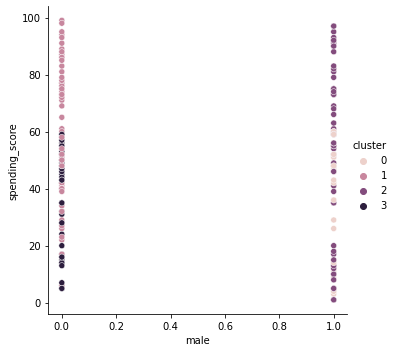

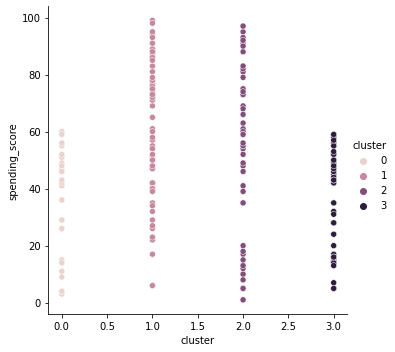

In [44]:
[f"{sns.relplot(data=X,x=i, y=y.spending_score,hue='cluster')}" for i in X.columns]

In [45]:
kmeans.cluster_centers_


array([[ 7.65508685e-01,  3.21258593e-01,  1.00000000e+00],
       [ 2.26923077e-01,  3.74824356e-01, -4.99600361e-16],
       [ 2.31106613e-01,  4.22922059e-01,  1.00000000e+00],
       [ 6.52472527e-01,  3.42505855e-01,  0.00000000e+00]])

In [46]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=['age', 'annual_income', 'male'])
centroids

,age,annual_income,male
0,0.765509,0.321259,1.000000e+00
1,0.226923,0.374824,-4.996004e-16
2,0.231107,0.422922,1.000000e+00
3,0.652473,0.342506,0.000000e+00


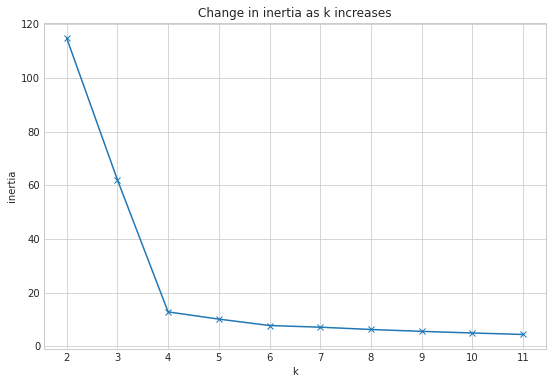

In [47]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

In [48]:
df = pd.read_csv('/Users/hinzlehome/codeup-data-science/clustering-exercises/csvs/cluster_data.csv')

In [49]:
df.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


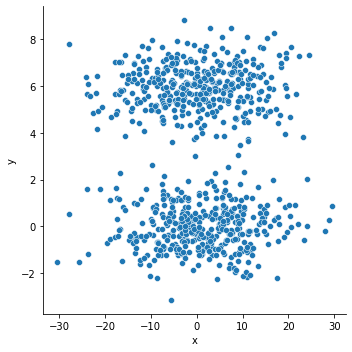

In [50]:
sns.relplot(data=df,x='x',y='y')

In [51]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

kmeans.predict(df)

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,

In [52]:
df['cluster'] = kmeans.predict(df)

['<seaborn.axisgrid.FacetGrid object at 0x7fced8b51820>',
 '<seaborn.axisgrid.FacetGrid object at 0x7fceb8be3a00>',
 '<seaborn.axisgrid.FacetGrid object at 0x7fce8125d4c0>']

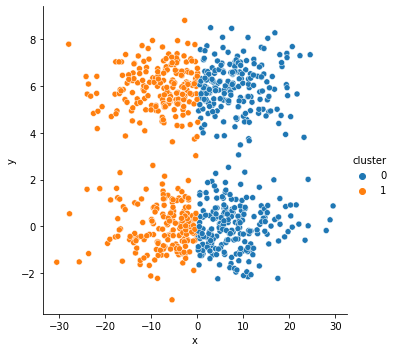

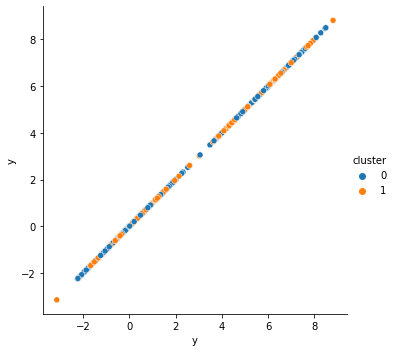

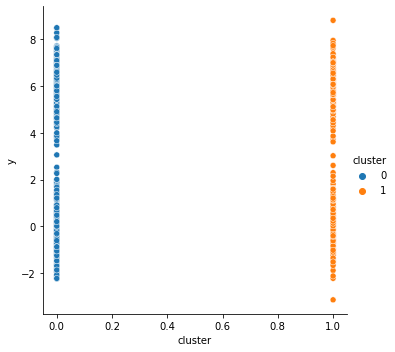

In [53]:
[f"{sns.relplot(data=df,x=i, y='y',hue='cluster')}" for i in df.columns]

In [54]:
df = pd.read_csv('/Users/hinzlehome/codeup-data-science/clustering-exercises/csvs/cluster_data.csv')

In [55]:
df.head()

,x,y
0,-3.641747,0.121540
1,-7.620447,1.810897
2,-6.505373,0.068072
3,7.730963,0.585521
4,17.283668,0.344804


In [56]:
cols=['x','y']

In [57]:

scaler = MinMaxScaler()
scaler.fit(df[cols])


MinMaxScaler()

In [58]:
df[cols]=scaler.transform(df[cols])

In [59]:
df.head()

,x,y
0,0.448379,0.273145
1,0.382135,0.414353
2,0.400701,0.268676
3,0.637730,0.311928
4,0.796779,0.291807


In [60]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(df)

kmeans.predict(df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [61]:
df['cluster'] = kmeans.predict(df)

['<seaborn.axisgrid.FacetGrid object at 0x7fcec92afa00>',
 '<seaborn.axisgrid.FacetGrid object at 0x7fcea8f59ee0>',
 '<seaborn.axisgrid.FacetGrid object at 0x7fcea8e5f8b0>']

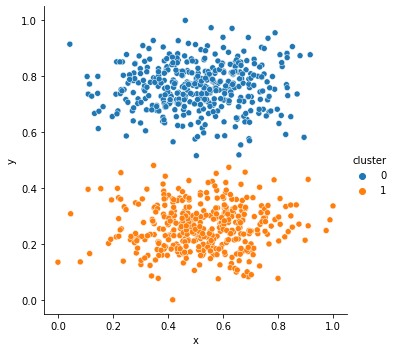

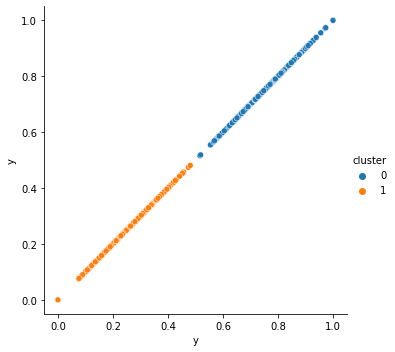

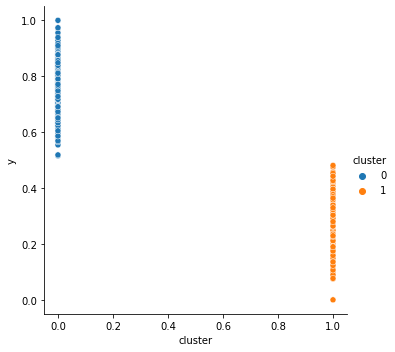

In [62]:
[f"{sns.relplot(data=df,x=i, y='y',hue='cluster')}" for i in df.columns]